# This notebook is to perform ML on embedded subnetworks and use the important features to find critical genes

In [1]:
import sys
sys.path.append("../..")
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import numpy as np
import os
import seaborn as sns
import networkx as nx
from src.eda.subset_network import *
from src.eda.eda_functions import *
from src.eda.process_phenotype import *
from src.embedding.network_embedding import network_embedding
from src.models.feature_extraction import *
from src.models.ML_functions import *
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from sys import platform 
prefix = 'G:' if platform == 'win32' else '/Volumes/GoogleDrive'

# Load embedding dfs

In [4]:
embedding_path = prefix +'/Shared drives/NIAAA_ASSIST/Data/embedding_derived/embedding_Jan12/'
for file in os.listdir(embedding_path):
    print(file)

embedded_len16_walk100_module[4]_n_[2]_df.csv
embedded_len16_walk100_module[4]_n_[3]_df.csv
embedded_len16_walk100_module[4]_n_[]_df.csv
embedded_len16_walk100_module[4]_n_[0]_df.csv
embedded_len16_walk100_module[4]_n_[1]_df.csv


In [9]:
%%time
embedding_path = prefix +'/Shared drives/NIAAA_ASSIST/Data/embedding_derived/embedding_Jan12/'
emb_list = []
embedding_names = []
for file in os.listdir(embedding_path):
    emb = pd.read_csv(embedding_path + file, index_col = 0)
    emb_list.append(emb)
    emb_name = '_'.join(file.split('_')[-4:-1])
    embedding_names.append(emb_name)

Wall time: 345 ms


In [14]:
%%time
# process embedding to be ready for ML
processed_emb_dfs = []
for emb in emb_list:
    processed_emb_dfs.append(process_emb_for_ML(emb))

Wall time: 53.7 ms


In [83]:
## Could use test-harness to run ML but harder to re-use the same models to extract feature importances so I used sklearn models directly instead
# th_path = 'F:/data/emb_ML_Dec17'
# feature_cols = processed_emb_dfs[0].columns[:64].tolist()
# for i, emb_df in enumerate(processed_emb_dfs):
#     emb_df['index_col'] = range(len(emb_df))
#     run_test_harness_ml(emb_df, output_dir=th_path, description=subnetwork_names[i],feature_cols_to_use=feature_cols, 
#            models_to_test = [logistic_classifier, random_forest_classification, gradient_boosted_tree], 
#            feature_cols_to_normalize=feature_cols, sparse_cols_to_use=None)
# plot_ML_results(th_path, subnetwork_names)


----------------------------------------------------------------------------------------------------
Starting run of model logistic_classifier at time 14:35:14
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.01 seconds


C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Testing time was: 0.01 seconds
Run finished at 14:35:14. Total run time = 0.11 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:35:14
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.99 seconds
Testing time was: 0.14 seconds
Run finished at 14:35:16. Total run time = 1.36 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:35:16
Normalizing training and testing splits...
Starting Classification training...
Training time was: 4.93 seconds
Testing time was: 0.01 seconds
Run finished at 14:35:21. Total run 

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Testing time was: 0.01 seconds
Run finished at 14:35:21. Total run time = 0.15 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:35:21
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.96 seconds
Testing time was: 0.18 seconds
Run finished at 14:35:23. Total run time = 1.34 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:35:23
Normalizing training and testing splits...
Starting Classification training...
Training time was: 5.49 seconds
Testing time was: 0.02 seconds
Run finished at 14:35:28. Total run 

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Run finished at 14:35:29. Total run time = 0.24 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:35:29
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.13 seconds
Testing time was: 0.12 seconds
Run finished at 14:35:30. Total run time = 1.33 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:35:30
Normalizing training and testing splits...
Starting Classification training...
Training time was: 4.74 seconds
Testing time was: 0.01 seconds
Run finished at 14:35:35. Total run time = 4.84 seconds
^^^^^^^^^^^

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Training time was: 0.01 seconds
Testing time was: 0.02 seconds
Run finished at 14:35:35. Total run time = 0.13 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:35:36
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.04 seconds
Testing time was: 0.14 seconds
Run finished at 14:35:37. Total run time = 1.41 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:35:37
Normalizing training and testing splits...
Starting Classification training...
Training time was: 5.25 seconds
Testing time was: 0.01 seconds
Run 

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Run finished at 14:35:43. Total run time = 0.13 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:35:43
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.04 seconds
Testing time was: 0.13 seconds
Run finished at 14:35:45. Total run time = 1.40 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:35:45
Normalizing training and testing splits...
Starting Classification training...
Training time was: 5.10 seconds
Testing time was: 0.02 seconds
Run finished at 14:35:50. Total run time = 5.22 seconds
^^^^^^^^^^^

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Run finished at 14:35:50. Total run time = 0.28 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:35:50
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.97 seconds
Testing time was: 0.14 seconds
Run finished at 14:35:52. Total run time = 1.37 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:35:52
Normalizing training and testing splits...
Starting Classification training...
Training time was: 4.82 seconds
Testing time was: 0.01 seconds
Run finished at 14:35:57. Total run time = 5.05 seconds
^^^^^^^^^^^

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Training time was: 0.02 seconds
Testing time was: 0.01 seconds
Run finished at 14:35:57. Total run time = 0.15 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:35:57
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.93 seconds
Testing time was: 0.12 seconds
Run finished at 14:35:59. Total run time = 1.31 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:35:59
Normalizing training and testing splits...
Starting Classification training...
Training time was: 5.31 seconds
Testing time was: 0.01 seconds
Run 

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Run finished at 14:36:05. Total run time = 0.26 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:36:05
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.84 seconds
Testing time was: 0.15 seconds
Run finished at 14:36:06. Total run time = 1.20 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:36:06
Normalizing training and testing splits...
Starting Classification training...
Training time was: 5.44 seconds
Testing time was: 0.01 seconds
Run finished at 14:36:12. Total run time = 5.69 seconds
^^^^^^^^^^^

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:36:12
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.89 seconds
Testing time was: 0.16 seconds
Run finished at 14:36:13. Total run time = 1.17 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:36:13
Normalizing training and testing splits...
Starting Classification training...
Training time was: 5.08 seconds
Testing time was: 0.01 seconds
Run finished at 14:36:19. Total run time = 5.32 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


-------------------------------------------------------------------

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:36:19
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.98 seconds
Testing time was: 0.14 seconds
Run finished at 14:36:20. Total run time = 1.36 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:36:20
Normalizing training and testing splits...
Starting Classification training...
Training time was: 5.92 seconds
Testing time was: 0.02 seconds
Run finished at 14:36:27. Total run time = 6.17 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


-------------------------------------------------------------------

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Training time was: 0.01 seconds
Testing time was: 0.02 seconds
Run finished at 14:36:27. Total run time = 0.15 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:36:27
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.80 seconds
Testing time was: 0.15 seconds
Run finished at 14:36:28. Total run time = 1.10 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:36:28
Normalizing training and testing splits...
Starting Classification training...
Training time was: 5.07 seconds
Testing time was: 0.02 seconds
Run 

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Testing time was: 0.01 seconds
Run finished at 14:36:34. Total run time = 0.25 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:36:34
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.09 seconds
Testing time was: 0.17 seconds
Run finished at 14:36:36. Total run time = 1.46 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:36:36
Normalizing training and testing splits...
Starting Classification training...
Training time was: 4.75 seconds
Testing time was: 0.01 seconds
Run finished at 14:36:41. Total run 

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:36:41
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.05 seconds
Testing time was: 0.16 seconds
Run finished at 14:36:43. Total run time = 1.57 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:36:43
Normalizing training and testing splits...
Starting Classification training...
Training time was: 5.35 seconds
Testing time was: 0.02 seconds
Run finished at 14:36:48. Total run time = 5.65 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


-------------------------------------------------------------------

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Run finished at 14:36:49. Total run time = 0.28 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:36:49
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.99 seconds
Testing time was: 0.17 seconds
Run finished at 14:36:50. Total run time = 1.46 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:36:50
Normalizing training and testing splits...
Starting Classification training...
Training time was: 5.03 seconds
Testing time was: 0.01 seconds
Run finished at 14:36:56. Total run time = 5.29 seconds
^^^^^^^^^^^

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Run finished at 14:36:56. Total run time = 0.28 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:36:56
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.84 seconds
Testing time was: 0.13 seconds
Run finished at 14:36:57. Total run time = 1.33 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:36:58
Normalizing training and testing splits...
Starting Classification training...
Training time was: 5.33 seconds
Testing time was: 0.02 seconds
Run finished at 14:37:03. Total run time = 5.62 seconds
^^^^^^^^^^^

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Training time was: 0.01 seconds
Testing time was: 0.01 seconds
Run finished at 14:37:04. Total run time = 0.26 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:37:04
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.02 seconds
Testing time was: 0.16 seconds
Run finished at 14:37:05. Total run time = 1.45 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:37:05
Normalizing training and testing splits...
Starting Classification training...
Training time was: 5.34 seconds
Testing time was: 0.01 seconds
Run 

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Run finished at 14:37:11. Total run time = 0.31 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:37:11
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.12 seconds
Testing time was: 0.17 seconds
Run finished at 14:37:13. Total run time = 1.50 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:37:13
Normalizing training and testing splits...
Starting Classification training...
Training time was: 4.42 seconds
Testing time was: 0.01 seconds
Run finished at 14:37:18. Total run time = 4.68 seconds
^^^^^^^^^^^

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Run finished at 14:37:18. Total run time = 0.17 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:37:18
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.10 seconds
Testing time was: 0.15 seconds
Run finished at 14:37:19. Total run time = 1.42 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:37:20
Normalizing training and testing splits...
Starting Classification training...
Training time was: 4.58 seconds
Testing time was: 0.01 seconds
Run finished at 14:37:24. Total run time = 4.84 seconds
^^^^^^^^^^^

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:37:25
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.23 seconds
Testing time was: 0.15 seconds
Run finished at 14:37:27. Total run time = 1.68 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:37:27
Normalizing training and testing splits...
Starting Classification training...
Training time was: 4.38 seconds
Testing time was: 0.01 seconds
Run finished at 14:37:31. Total run time = 4.70 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


-------------------------------------------------------------------

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Run finished at 14:37:32. Total run time = 0.18 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:37:32
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.16 seconds
Testing time was: 0.13 seconds
Run finished at 14:37:33. Total run time = 1.46 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:37:33
Normalizing training and testing splits...
Starting Classification training...
Training time was: 3.93 seconds
Testing time was: 0.01 seconds
Run finished at 14:37:38. Total run time = 4.27 seconds
^^^^^^^^^^^

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Run finished at 14:37:38. Total run time = 0.18 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:37:38
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.11 seconds
Testing time was: 0.15 seconds
Run finished at 14:37:39. Total run time = 1.49 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:37:39
Normalizing training and testing splits...
Starting Classification training...
Training time was: 4.16 seconds
Testing time was: 0.01 seconds
Run finished at 14:37:44. Total run time = 4.28 seconds
^^^^^^^^^^^

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Run finished at 14:37:44. Total run time = 0.33 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:37:44
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.06 seconds
Testing time was: 0.15 seconds
Run finished at 14:37:46. Total run time = 1.43 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:37:46
Normalizing training and testing splits...
Starting Classification training...
Training time was: 4.11 seconds
Testing time was: 0.01 seconds
Run finished at 14:37:50. Total run time = 4.43 seconds
^^^^^^^^^^^

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Run finished at 14:37:51. Total run time = 0.30 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:37:51
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.20 seconds
Testing time was: 0.26 seconds
Run finished at 14:37:53. Total run time = 1.89 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:37:53
Normalizing training and testing splits...
Starting Classification training...
Training time was: 4.52 seconds
Testing time was: 0.02 seconds
Run finished at 14:37:58. Total run time = 4.79 seconds
^^^^^^^^^^^

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Run finished at 14:37:58. Total run time = 0.23 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:37:58
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.07 seconds
Testing time was: 0.18 seconds
Run finished at 14:38:00. Total run time = 1.54 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:38:00
Normalizing training and testing splits...
Starting Classification training...
Training time was: 4.39 seconds
Testing time was: 0.02 seconds
Run finished at 14:38:04. Total run time = 4.66 seconds
^^^^^^^^^^^

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Run finished at 14:38:05. Total run time = 0.27 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:38:05
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.02 seconds
Testing time was: 0.19 seconds
Run finished at 14:38:06. Total run time = 1.52 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:38:06
Normalizing training and testing splits...
Starting Classification training...
Training time was: 4.37 seconds
Testing time was: 0.01 seconds
Run finished at 14:38:11. Total run time = 4.53 seconds
^^^^^^^^^^^

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Run finished at 14:38:11. Total run time = 0.31 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:38:11
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.03 seconds
Testing time was: 0.17 seconds
Run finished at 14:38:13. Total run time = 1.49 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:38:13
Normalizing training and testing splits...
Starting Classification training...
Training time was: 4.44 seconds
Testing time was: 0.01 seconds
Run finished at 14:38:18. Total run time = 4.77 seconds
^^^^^^^^^^^

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Testing time was: 0.01 seconds
Run finished at 14:38:18. Total run time = 0.23 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:38:18
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.05 seconds
Testing time was: 0.13 seconds
Run finished at 14:38:20. Total run time = 1.40 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:38:20
Normalizing training and testing splits...
Starting Classification training...
Training time was: 5.13 seconds
Testing time was: 0.02 seconds
Run finished at 14:38:25. Total run 

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Run finished at 14:38:26. Total run time = 0.36 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:38:26
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.02 seconds
Testing time was: 0.17 seconds
Run finished at 14:38:27. Total run time = 1.57 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:38:28
Normalizing training and testing splits...
Starting Classification training...
Training time was: 5.51 seconds
Testing time was: 0.01 seconds
Run finished at 14:38:33. Total run time = 5.84 seconds
^^^^^^^^^^^

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Run finished at 14:38:34. Total run time = 0.33 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:38:34
Normalizing training and testing splits...
Starting Classification training...
Training time was: 1.12 seconds
Testing time was: 0.15 seconds
Run finished at 14:38:36. Total run time = 1.60 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:38:36
Normalizing training and testing splits...
Starting Classification training...
Training time was: 5.99 seconds
Testing time was: 0.01 seconds
Run finished at 14:38:42. Total run time = 6.31 seconds
^^^^^^^^^^^

C:\Users\bbche\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Run finished at 14:38:42. Total run time = 0.19 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model random_forest_classification at time 14:38:42
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.94 seconds
Testing time was: 0.14 seconds
Run finished at 14:38:44. Total run time = 1.32 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gradient_boosted_tree at time 14:38:44
Normalizing training and testing splits...
Starting Classification training...
Training time was: 6.13 seconds
Testing time was: 0.02 seconds
Run finished at 14:38:50. Total run time = 6.48 seconds
^^^^^^^^^^^

# Run ML on each embedding (5 embedding total), 3 models each and each model was repeated 3 times so a total of 5 x 3 x 3 = 45 results

In [16]:
# generate output_dirs for ML results 
output_dirs = [f'../../data/{embedding_names[i]}/' for i in range(len(embedding_names))]

module[4]_n_[2] model saved
module[4]_n_[2] model saved
module[4]_n_[2] model saved
lr average: 0.52 ;  rf average: 0.59 ;  xgb_average: 0.58


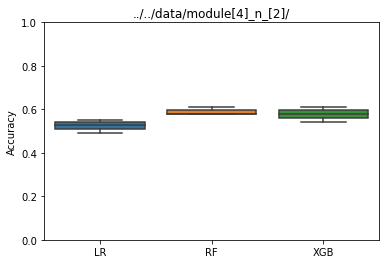

module[4]_n_[3] model saved
module[4]_n_[3] model saved
module[4]_n_[3] model saved
lr average: 0.54 ;  rf average: 0.67 ;  xgb_average: 0.66


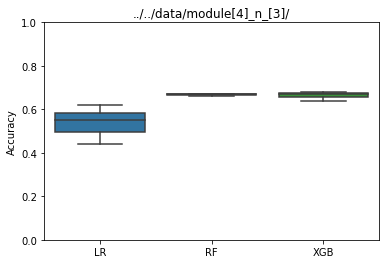

module[4]_n_[] model saved
module[4]_n_[] model saved
module[4]_n_[] model saved
lr average: 0.55 ;  rf average: 0.59 ;  xgb_average: 0.58


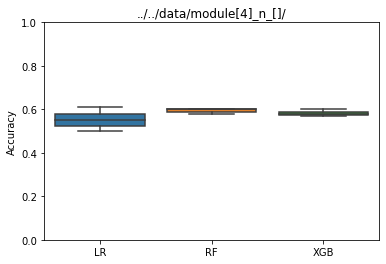

module[4]_n_[0] model saved
module[4]_n_[0] model saved
module[4]_n_[0] model saved
lr average: 0.62 ;  rf average: 0.74 ;  xgb_average: 0.71


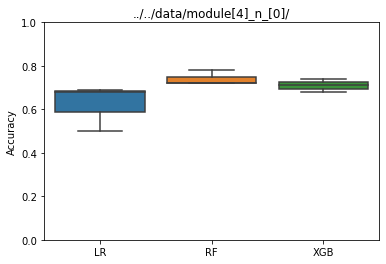

module[4]_n_[1] model saved
module[4]_n_[1] model saved
module[4]_n_[1] model saved
lr average: 0.56 ;  rf average: 0.65 ;  xgb_average: 0.64


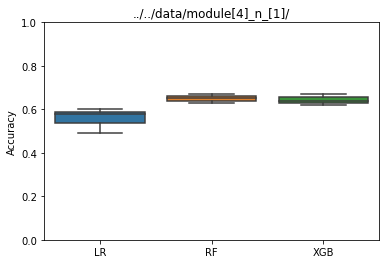

In [19]:
for i, processed_df in enumerate(processed_emb_dfs):
    run_ml(processed_df, emb_name = embedding_names[i], print_accuracy = True, output_dir = output_dirs[i])

# Getting the feature importances and the dimensions that make up 20% of feature importances

In [31]:
feature_importance_data_list = []
for model_dir in output_dirs:
    feature_importance_data = plot_feature_importances(model_dir, top_n_coef = 0.5, print_num_dim = False, plot_heatmap = False, return_top_dim = True)
    feature_importance_data_list.append(feature_importance_data)
# plot_feature_importances(model_path, top_n_coef = 0.2, print_num_dim = True, plot_heatmap = False, return_top_dim = False):
# feat_importance_data = list(map(plot_feature_importances, output_dirs, [0.5]*len(output_dirs), [False]*len(output_dirs), [False]*len(output_dirs), [True]*len(output_dirs)))

In [34]:
# feat_importance_data is made up of feature coefficients and top dimensions for each set of coefficients so this step is to split the data. The loop is for 5 embeddings so 5 results.
feat_importance_list = [feature_importance_data_list[i][0] for i in range(len(feature_importance_data_list))]
top_dim_list = [feature_importance_data_list[i][1] for i in range(len(feature_importance_data_list))]

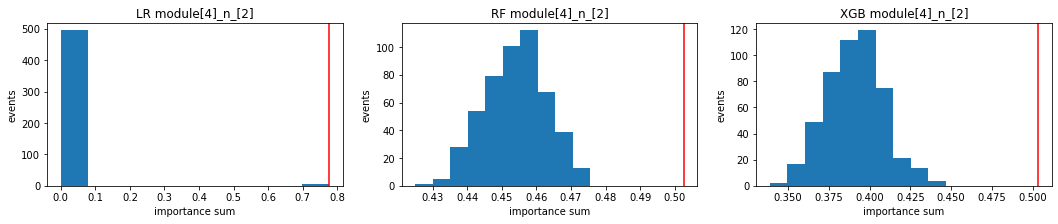

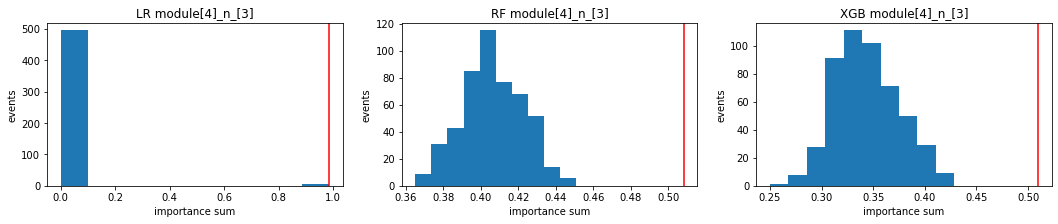

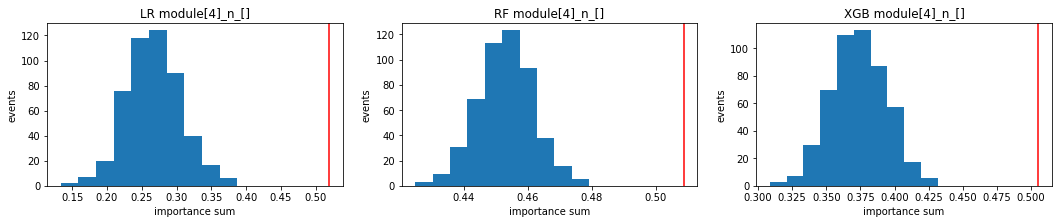

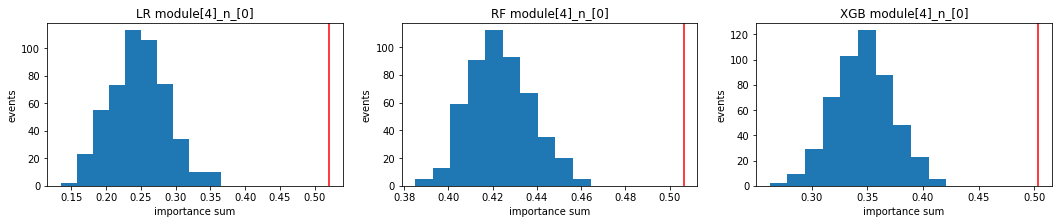

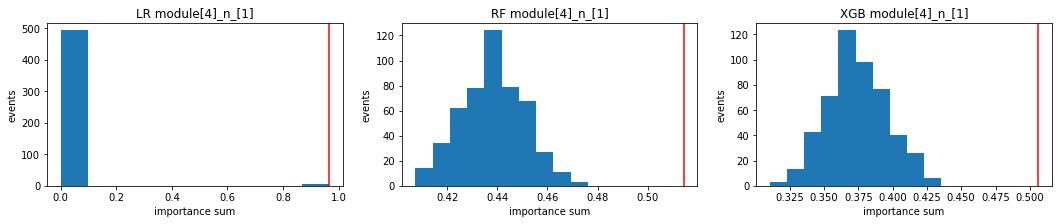

In [36]:
# The blue bars are the feature importance sum from random selection of the dimensions
# The red vertical line is the actual feature importance sum selected by ML
# Note each model was repeated 3 times but only 1 was shown
for i in range(len(feat_importance_list)):
    plot_random_feature_importance(feat_importance_list[i], top_dim_list[i], embedding_names[i])

## Determine jaccard similarity between the "important dimensions" for the repeats of the model

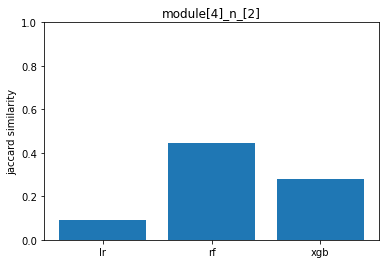

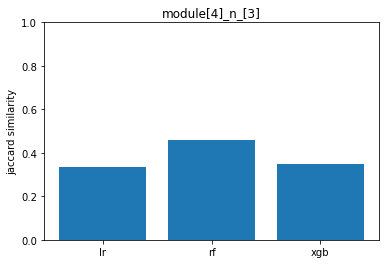

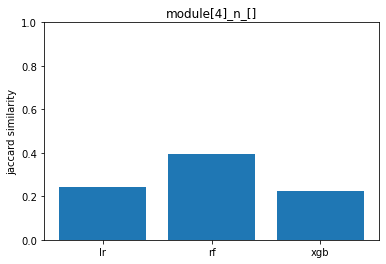

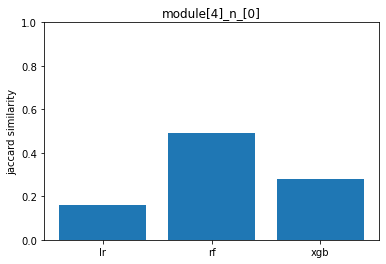

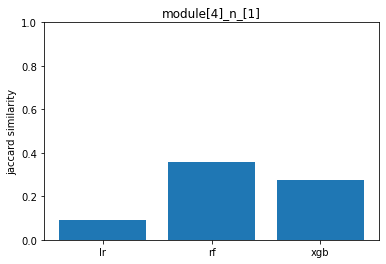

In [37]:
for i, top_dim in enumerate(top_dim_list):
    jaccard_average(top_dim, embedding_names[i])

# Identify critical genes from the parameters used (5 embeddings, 3 models, 3 repeats)

In [100]:
critical_gene_sets = []
critical_gene_dfs = []
for i, processed_df in enumerate(processed_emb_dfs):
    gene_set = get_critical_gene_sets(processed_df, top_dim_list[i], max_dist = 0.55)
    critical_gene_sets.append(gene_set)
    critical_gene_dfs.append(get_critical_gene_df(gene_set))

In [101]:
len(critical_gene_dfs)

5

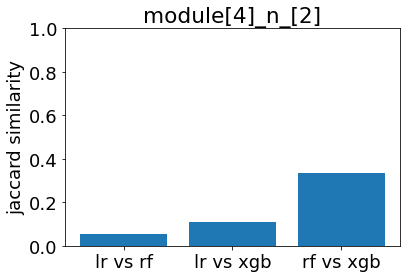

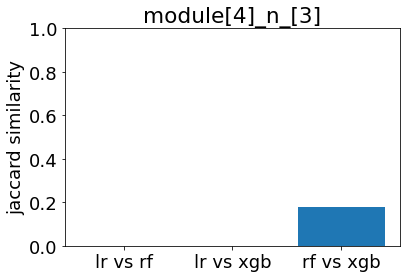

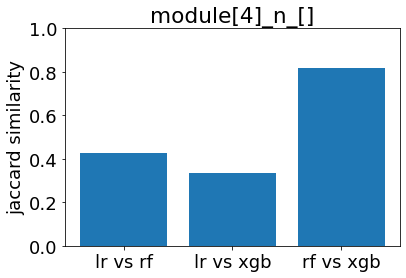

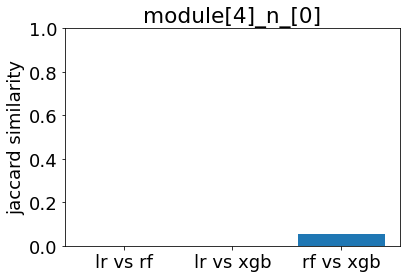

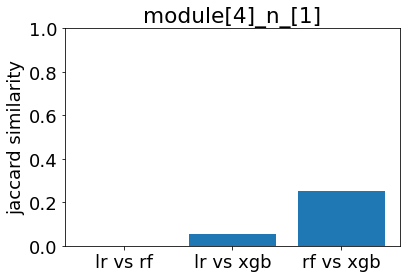

In [105]:
intersect_gene_list = []
for i, critical_gene_df in enumerate(critical_gene_dfs):
    intersect_genes = jaccard_critical_genes(critical_gene_df, embedding_names[i])
    intersect_gene_list.append(intersect_genes)

## Plot correlation of sets of critical genes found in common in 3 models for each embedding

module[4]_n_[3] does not have critical genes in common between all 3 models
module[4]_n_[0] does not have critical genes in common between all 3 models
module[4]_n_[1] does not have critical genes in common between all 3 models


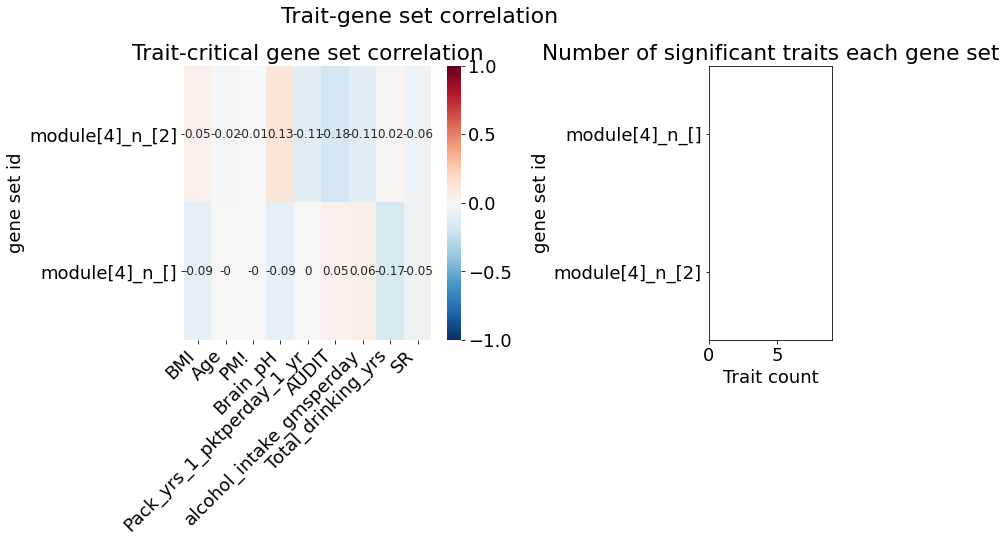

In [199]:
# expression_meta_df = pd.read_csv(prefix + '/Shared drives/NIAAA_ASSIST/Data/eda_derived/expression_meta.csv', low_memory = False)
gene_set_phenotype_corr(intersect_gene_list, embedding_names, expression_meta_df)

## Plot number of nearby impact genes to the critical genes. 1 figure per embedding

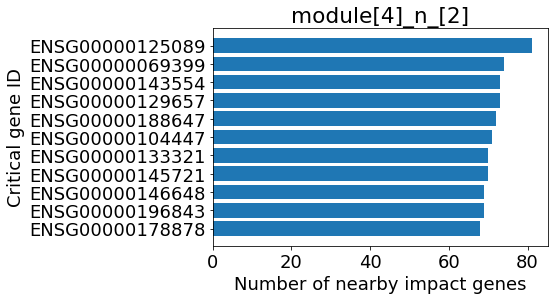

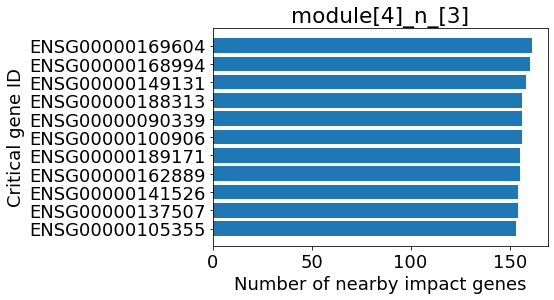

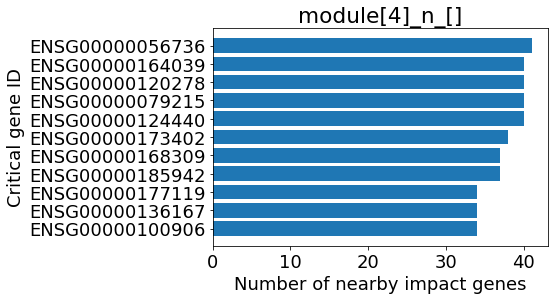

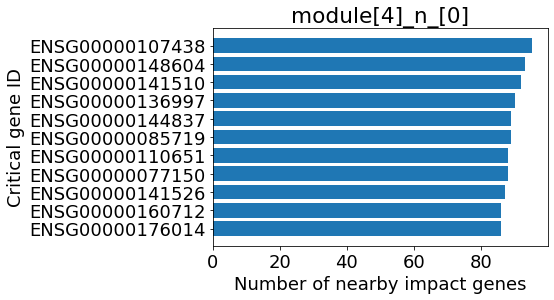

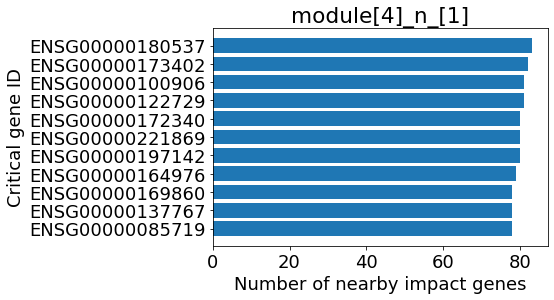

In [178]:
# critical_gene_sets2 is different from critical_gene_sets in that it only has 
critical_gene_sets2 = []
for i, critical_gene_df in enumerate(critical_gene_dfs):
    gene_set = plot_nearby_impact_num(critical_gene_df, embedding_names[i])
    critical_gene_sets2.append(gene_set)

## Plot each set of critical genes and their correlation with alcohol traits. Each gene set is from 1 embedding

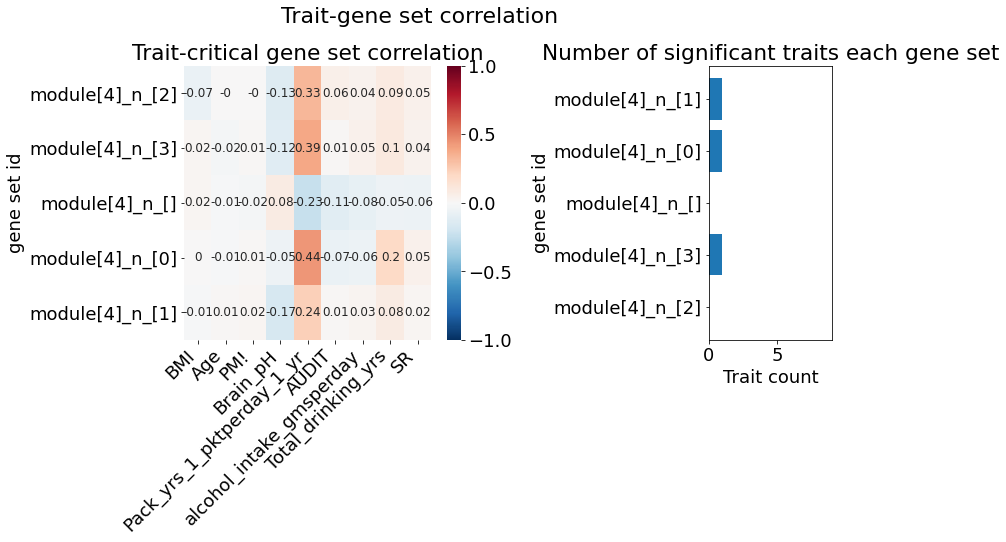

In [198]:
# Plot correlation of top critical genes (with most nearby impact genes) for each embedding
gene_set_phenotype_corr(critical_gene_sets2, embedding_names, expression_meta_df)